<a href="https://colab.research.google.com/github/bbash/ArewaDS-Deep-Learning/blob/main/week_4_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 4. PyTorch Computer Vision Exercises

## Arewa Data Science Academy
## Deep Learning Cohort1.0
## Name: Bashir Salisu Abubakar
## Email: bsalisu2016@gmail.com
## Title: Week 4 Solution

In [50]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Device is: {device}")

2.1.0+cu121
Device is: cuda


## 1. What are 3 areas in industry where computer vision is currently being used?

In [51]:
"""
Computer Vision can be applied in various areas. some of them are:
1. Autonomous Car
2. Health care
3. Digital Agriculture
"""

'\nComputer Vision can be applied in various areas. some of them are:\n1. Autonomous Car\n2. Health care\n3. Digital Agriculture\n'

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

In [52]:
"""
    Overfitting: an overfit model performs well on the training data but poorly on new,
                 unseen data because it has essentially memorized the training data instead of learning the underlying patterns.
"""

'\n    Overfitting: an overfit model performs well on the training data but poorly on new,\n                 unseen data because it has essentially memorized the training data instead of learning the underlying patterns.\n'

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

In [53]:
"""
    I. Increase the size of the training dataset
    2. Regularization
    3. Cross validation
"""

'\n    I. Increase the size of the training dataset\n    2. Regularization\n    3. Cross validation\n'

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [54]:
# import torch and nn
import torch
from torch import nn

# import the troch vision library
import torchvision
from torchvision.datasets import MNIST
import torchvision.transforms
from torchvision.transforms import ToTensor



In [55]:
# downloading the MNIST dataset

train = MNIST(root='data',
              download=True,
              train=True,
              transform=ToTensor())

test = MNIST(root='data',
             download=True,
             train=False,
             transform=ToTensor())

In [56]:
# checking the length
len(train), len(test)

(60000, 10000)

In [57]:
image, label = train[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [58]:
train.classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

## 6. Visualize at least 5 different samples of the MNIST training dataset.

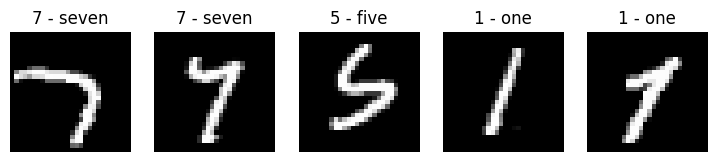

In [59]:
# matplot
import matplotlib.pyplot as plt

torch.manual_seed(42)
row, col = 1, 5
fig = plt.figure(figsize=(9, 9))
for i in range(1, row*col +1):
    random_in = torch.randint(1, len(train), size=[1]).item()
    img, label = train[random_in]
    fig.add_subplot(row, col, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(train.classes[label])
    plt.axis(False);

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [60]:
#import torch.util
from torch.utils.data import DataLoader

# Batch size
BATCH_SIZE = 32

train_loader = DataLoader(train,
                          batch_size=BATCH_SIZE,
                          shuffle=True)
test_loader = DataLoader(test,
                         batch_size=BATCH_SIZE)
len(train_loader), len(test_loader)

(1875, 313)

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [61]:
class MNISTV2(nn.Module):

    def __init__(self, input, hidden, output):

        super().__init__()

        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input,
                      out_channels=hidden,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden,
                      out_channels=hidden,
                      kernel_size=3,
                      stride =1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)

            )

        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden, hidden, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden, hidden, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),

            nn.Linear(in_features=hidden*7*7,
                      out_features=output)
        )

    def forward(self, x):
        x = self.block_1(x)
        x = self.block_2(x)
        x = self.classifier(x)
        return x


torch.manual_seed(42)
MNIST_Model = MNISTV2(input = 1,
                       hidden=10,
                       output=len(train.classes))
MNIST_Model

MNISTV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [62]:
# loss and optimizer
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=MNIST_Model.parameters(),
                            lr = 0.1)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [63]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred = model(X)

            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )

        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [64]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format).
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [65]:
# ACCURACY
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

helper_functions.py already exists, skipping download


In [66]:
torch.manual_seed(42)
from helper_functions import accuracy_fn
from tqdm.auto import tqdm

#measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

epochs = 5

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")

    train_step(data_loader=train_loader,
        model=MNIST_Model,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=device
    )
    test_step(data_loader=test_loader,
        model=MNIST_Model,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device=device
    )

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                           end=train_time_end_model_2,
                                           device=device)


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.28341 | Train accuracy: 90.60%
Test loss: 0.06752 | Test accuracy: 97.92%

Epoch: 1
---------
Train loss: 0.07487 | Train accuracy: 97.65%
Test loss: 0.05358 | Test accuracy: 98.25%

Epoch: 2
---------
Train loss: 0.05659 | Train accuracy: 98.20%
Test loss: 0.05147 | Test accuracy: 98.27%

Epoch: 3
---------
Train loss: 0.04825 | Train accuracy: 98.43%
Test loss: 0.04940 | Test accuracy: 98.35%

Epoch: 4
---------
Train loss: 0.04233 | Train accuracy: 98.68%
Test loss: 0.05158 | Test accuracy: 98.21%

Train time on cuda: 65.675 seconds


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

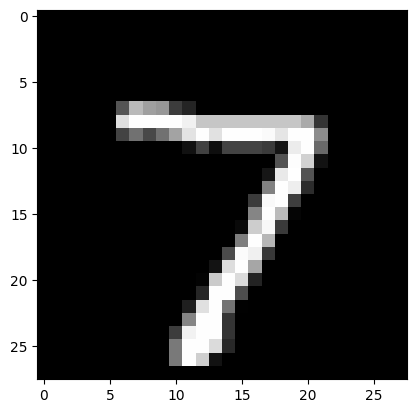

In [67]:

# Make predictions with the trained model
plt.imshow(test[0][0].squeeze(), cmap="gray")

In [68]:

# Logits -> Prediction probabilities -> Prediction labels
model_pred_logits = MNIST_Model(test[0][0].unsqueeze(dim=0).to(device)) # make sure image is right shape + on right device
model_pred_probs = torch.softmax(model_pred_logits, dim=1)
model_pred_label = torch.argmax(model_pred_probs, dim=1)
model_pred_label

tensor([7], device='cuda:0')

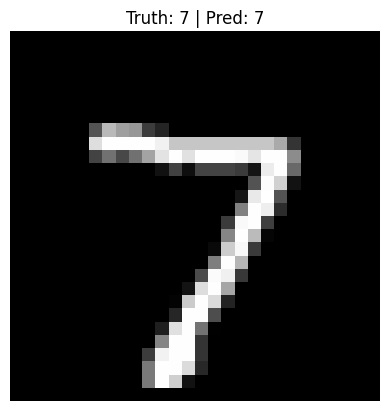

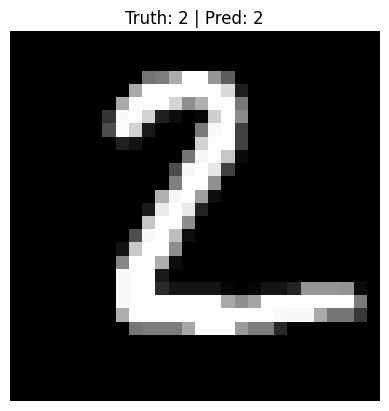

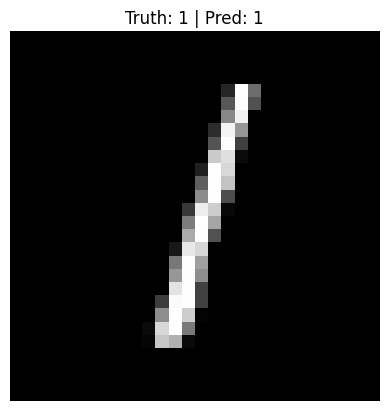

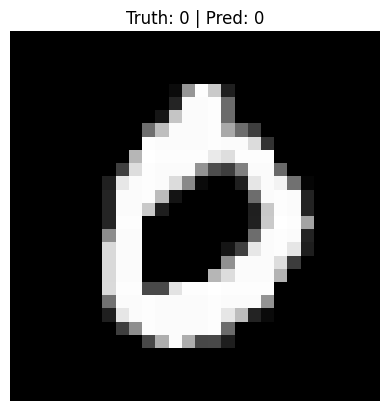

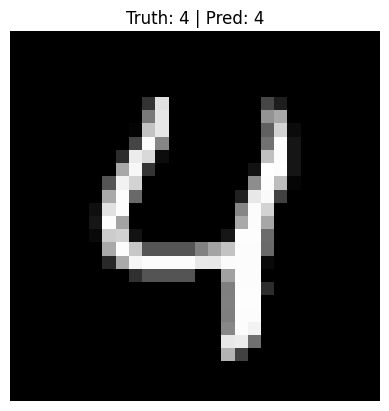

In [69]:
num_to_plot = 5
for i in range(num_to_plot):
  # Get image and labels from the test data
  img = test[i][0]
  label = test[i][1]

  # Make prediction on image
  model_pred_logits = MNIST_Model(img.unsqueeze(dim=0).to(device))
  model_pred_probs = torch.softmax(model_pred_logits, dim=1)
  model_pred_label = torch.argmax(model_pred_probs, dim=1)

  # Plot the image and prediction
  plt.figure()
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(f"Truth: {label} | Pred: {model_pred_label.cpu().item()}")
  plt.axis(False);

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [70]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.23.1


In [71]:
# Make predictions across all test data
from tqdm.auto import tqdm
MNIST_Model.eval()
y_preds = []
with torch.inference_mode():
  for batch, (X, y) in tqdm(enumerate(test_loader)):
    # Make sure data on right device
    X, y = X.to(device), y.to(device)
    # Forward pass
    y_pred_logits = MNIST_Model(X)
    # Logits -> Pred probs -> Pred label
    y_pred_labels = torch.argmax(torch.softmax(y_pred_logits, dim=1), dim=1)
    # Append the labels to the preds list
    y_preds.append(y_pred_labels)
  y_preds=torch.cat(y_preds).cpu()
len(y_preds)

0it [00:00, ?it/s]

10000

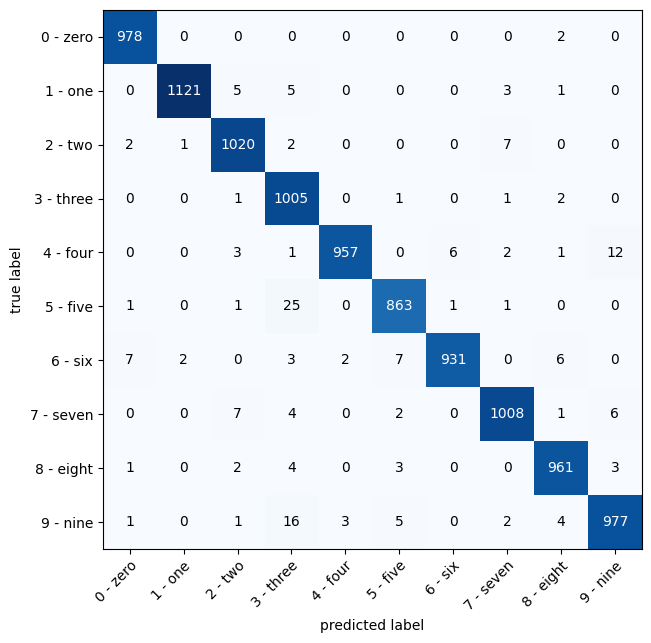

In [72]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# Setup confusion matrix
confmat = ConfusionMatrix(task="multiclass", num_classes=len(train.classes))
confmat_tensor = confmat(preds=y_preds,
                         target=test.targets)

# Plot the confusion matrix
fix, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=test.classes,
    figsize=(10, 7)
)


## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [73]:
random_tensor = torch.rand([1, 3, 64, 64])
random_tensor.shape

torch.Size([1, 3, 64, 64])

In [74]:

conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=64,
                       kernel_size=3,
                       stride=2,
                       padding=1)

print(f"Random tensor original shape: {random_tensor.shape}")
random_tensor_through_conv_layer = conv_layer(random_tensor)
print(f"Random tensor through conv layer shape: {random_tensor_through_conv_layer.shape}")

Random tensor original shape: torch.Size([1, 3, 64, 64])
Random tensor through conv layer shape: torch.Size([1, 64, 32, 32])


## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

In [75]:
torch.manual_seed(42)
fashion_model = MNISTV2(input = 1,
                       hidden= 10,
                       output=len(train.classes)).to(device)
fashion_model

MNISTV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [76]:

epochs = 5

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")

    train_step(data_loader=train_loader,
        model=fashion_model,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=device
    )
    test_step(data_loader=test_loader,
        model=fashion_model,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device=device
    )

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                           end=train_time_end_model_2,
                                           device=device)


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 2.30356 | Train accuracy: 9.92%
Test loss: 2.30337 | Test accuracy: 10.31%

Epoch: 1
---------
Train loss: 2.30356 | Train accuracy: 9.92%
Test loss: 2.30337 | Test accuracy: 10.31%

Epoch: 2
---------
Train loss: 2.30356 | Train accuracy: 9.92%
Test loss: 2.30337 | Test accuracy: 10.31%

Epoch: 3
---------
Train loss: 2.30356 | Train accuracy: 9.92%
Test loss: 2.30337 | Test accuracy: 10.31%

Epoch: 4
---------
Train loss: 2.30356 | Train accuracy: 9.92%
Test loss: 2.30337 | Test accuracy: 10.31%

Train time on cuda: 134.433 seconds


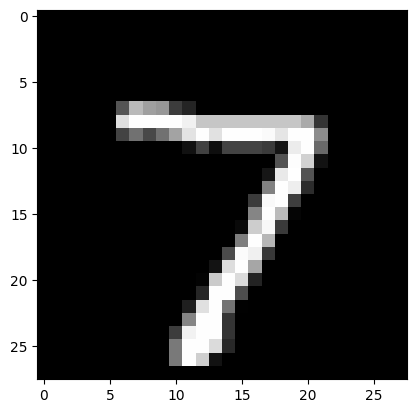

In [77]:
# Make predictions with the trained model
plt.imshow(test[0][0].squeeze(), cmap="gray")

In [78]:
# Logits -> Prediction probabilities -> Prediction labels
model_pred_logits = fashion_model(test[0][0].unsqueeze(dim=0).to(device)) # make sure image is right shape + on right device
model_pred_probs = torch.softmax(model_pred_logits, dim=1)
model_pred_label = torch.argmax(model_pred_probs, dim=1)
model_pred_label

tensor([2], device='cuda:0')

In [79]:
# Make predictions across all test data
from tqdm.auto import tqdm
fashion_model.eval()
y_preds = []
with torch.inference_mode():
  for batch, (X, y) in tqdm(enumerate(test_loader)):
    # Make sure data on right device
    X, y = X.to(device), y.to(device)
    # Forward pass
    y_pred_logits = fashion_model(X)
    # Logits -> Pred probs -> Pred label
    y_pred_labels = torch.argmax(torch.softmax(y_pred_logits, dim=1), dim=1)
    # Append the labels to the preds list
    y_preds.append(y_pred_labels)
  y_preds=torch.cat(y_preds).cpu()
len(y_preds)

0it [00:00, ?it/s]

10000